<a href="https://colab.research.google.com/github/leenu10/DataScienceAnalytics/blob/main/Leenu_week8_activity_ToH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carry out a descriptive analytics on the dataset



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Week_8_ToH_Q&A_dataset.csv')
data

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


In [ ]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [ ]:
data.groupby('Gender').describe()


Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


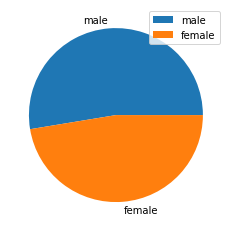

In [ ]:
plt.pie(data.groupby('Gender').mean(), labels=['male','female'])
plt.legend(loc = 'best')


In [ ]:
data.groupby('Test preparation').describe()


Total Marks                        ...                  
                       count       mean        std  ...   50%   75%   max
Test preparation                                    ...                  
completed                7.0  44.571429   3.359422  ...  44.0  46.0  50.0
none                    21.0  28.238095  11.661495  ...  27.0  38.0  48.0

[2 rows x 8 columns]

Check whether female and male students score the same marks?

In [ ]:
data.columns

Index(['Gender', 'Test preparation', 'Total Marks'], dtype='object')

In [ ]:
male = data[data['Gender']=='male']
male

,Gender,Test preparation,Total Marks
0,male,none,14
6,male,none,30
8,male,none,18
9,male,none,24
10,male,completed,44
11,male,none,23
12,male,completed,43
13,male,none,28
18,male,none,47
19,male,none,36


In [ ]:
female = data[data['Gender']=='female']

In [ ]:
 from scipy.stats import ttest_ind

In [ ]:
t_value, p_value = ttest_ind(male['Total Marks'],female['Total Marks'])
print('t_value = %.4f, p_value = %.4f'% (t_value, p_value))
print('\nNull hypothesis: There is no significant difference between the marks of male and female students.\n \nAlternative_hypothesis: There is significant difference between the marks of male and female students.')
if p_value <= 0.05:
  print('\nThe null hypothesis is rejected.\nIt is 95% confident that there is a significant differnce in marks scored by male and female candidates.\nThat is,Gender does have an effect in the marks scored.')
else:
  print('\nWe fail to reject the null hypothesis.\nIt is 95% confident that there is no significant difference in the marks of male and female students.\nThat is, Gender does not have any effect in the marks scored.')

t_value = -0.6941, p_value = 0.4938

Null hypothesis: There is no significant difference between the marks of male and female students.
 
Alternative_hypothesis: There is significant difference between the marks of male and female students.

We fail to reject the null hypothesis.
It is 95% confident that there is no significant difference in the marks of male and female students.
That is, Gender does not have any effect in the marks scored.


Did taking test preparation help the students?

In [ ]:
data['Test preparation'].unique()

array(['none', 'completed'], dtype=object)

In [ ]:
none = data[data['Test preparation']=='none']
completed = data[data['Test preparation']=='completed']

In [ ]:
t_value, p_value = ttest_ind(none['Total Marks'],completed['Total Marks'])
print('t_value = %.4f, p_value = %.4f'% (t_value, p_value))
print('\nNull hypothesis: Marks of students who completed the preparation is less than or equal to those who havent taken the preparation.')
print('\nAlternative_hypothesis: Marks of students who completed the preparation is greater than those who havent taken the preparation.')
if p_value <= 0.05:
  print('\nSince the p_value <= 0.05, the null hypothesis is rejected.\nIt is 95% confident that Marks of students who completed the preparation is greater than those who havent taken the preparation.\nThat is, Test preparation does have an effect in the marks scored.')
else:
  print('\nSince the p_value > 0.05, we fail to reject the null hypothesis.\nIt is 95% confident that Marks of students who completed the preparation is less than or equal to those who havent taken the preparation.\nThat is, Test preparation does not have any effect in the marks scored.')

t_value = -3.6144, p_value = 0.0013

Null hypothesis: Marks of students who completed the preparation is less than or equal to those who havent taken the preparation.

Alternative_hypothesis: Marks of students who completed the preparation is greater than those who havent taken the preparation.

Since the p_value <= 0.05, the null hypothesis is rejected.
It is 95% confident that Marks of students who completed the preparation is greater than those who havent taken the preparation.
That is, Test preparation does have an effect in the marks scored.
